In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:

df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month
df.head()   

#I want to regroup the years from september first to august 31st

tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()


,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


In [5]:

first_year=1893
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)


In [6]:

# Initialize the list to store the number of days needed per year to reach the threshold
threshold=tp_seasonal_year['TP']*0.5
wd50 = []


for this_year in tp_seasonal_year['year']:
    ano = f'{this_year-1}'
    ano_mas=f'{this_year}'  # Adjust for the year format
    tp_concat = pd.concat([df[(df['year'] == ano_mas) & (df['month'] < 9)],
                           df[(df['year'] == ano) & (df['month'] > 8)]])
    tp_concat_ranked=tp_concat[tp_concat['PRECIP_QUANTITY']>0].sort_values(by=['PRECIP_QUANTITY'],ascending=[False])
    cumsum = 0
    days_count = 0 
    for index, row in tp_concat_ranked.iterrows():
        cumsum += row['PRECIP_QUANTITY']
        days_count += 1 
        if cumsum > threshold[int(ano_mas)-first_year]:
        #if cumsum > 200:    
            wd50.append(days_count) 
            break


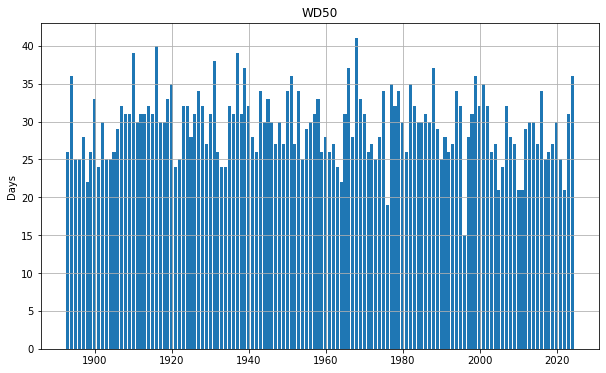

Moyenne de WD50 de 1893-2003: 29.954545454545453 et de 2004-2024: 27.238095238095237
Moyenne de WD50 de 1950-1985: 29.885714285714286 et de 1986-2024: 28.358974358974358


In [7]:


plt.figure(figsize=(10, 6))
plt.bar(years, wd50, label='Total Precipitation')
plt.ylabel('Days')
plt.title('WD50')
plt.grid()
#z = np.polyfit(years, wd50, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

print(f'Moyenne de WD50 de 1893-2003: {np.mean(wd50[:110])} et de 2004-2024: {np.mean(wd50[111:])}')
print(f'Moyenne de WD50 de 1950-1985: {np.mean(wd50[57:92])} et de 1986-2024: {np.mean(wd50[93:])}')
